<a href="https://colab.research.google.com/github/hritik7080/Weather-Prediction-Time-Series-Forecasting/blob/master/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set
Given dataset provides the weather data for city Delhi, India. We will try to analyze the weather and predict the temperature field _tempm in the datset with ***Time Series Forecasting***.

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "Your Kaggle Username"
os.environ['KAGGLE_KEY'] = "Your Kaggle Key"

In [0]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

In [0]:
from zipfile import ZipFile

with ZipFile('/content/delhi-weather-data.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [0]:
df = pd.read_csv("/content/testset.csv")

In [67]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [68]:
df[' _conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

### Part 1: A quick analysis of Weather in Delhi

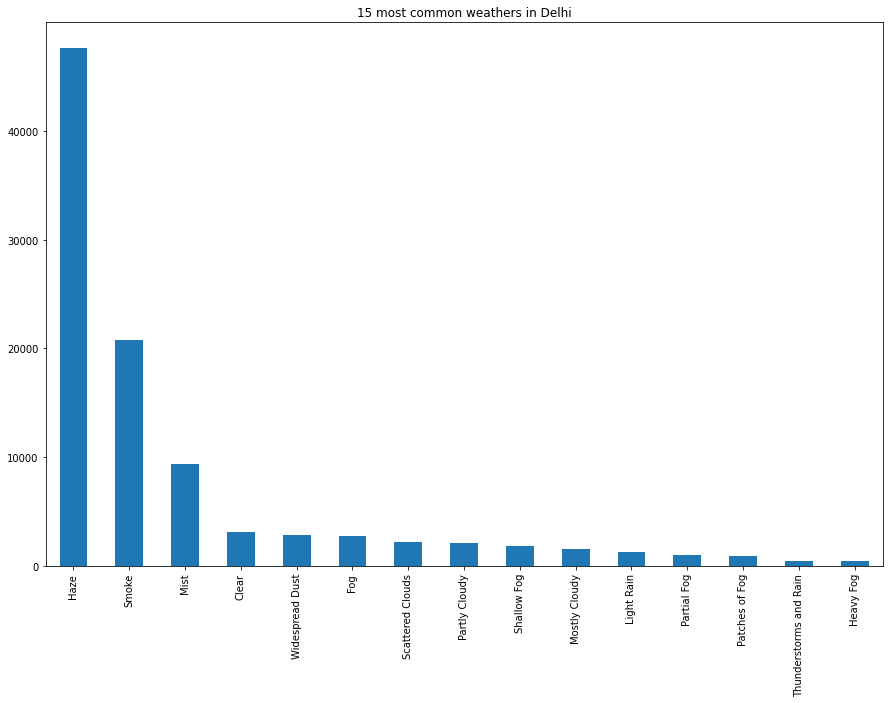

In [69]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

It is clearly visible that Haze and Smoke are most common weatehrs in Delhi

[]

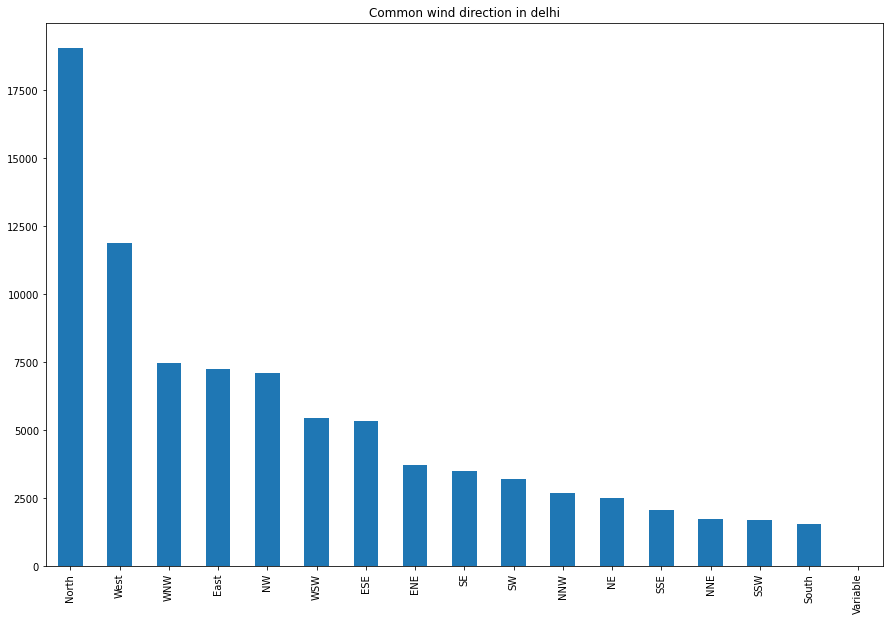

In [70]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in dehi.

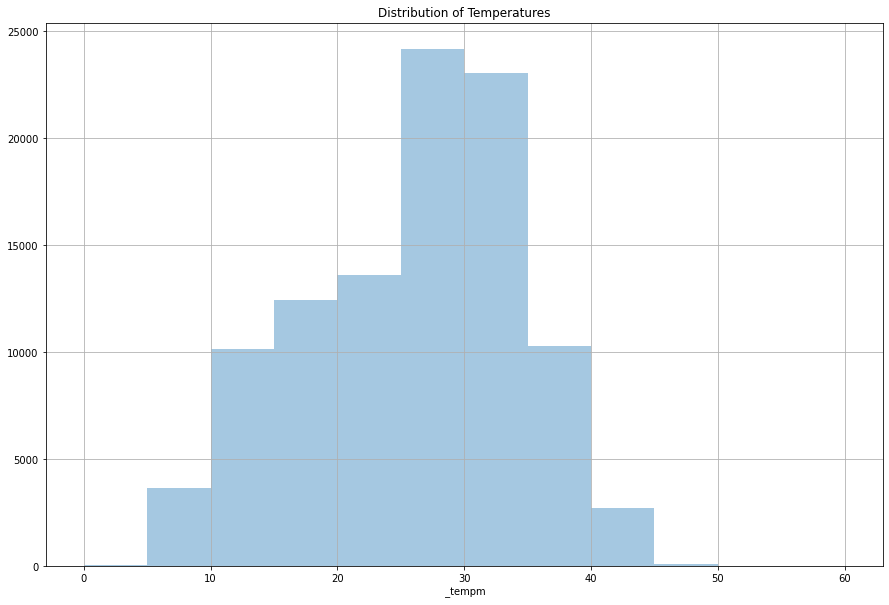

In [71]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [0]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [73]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [74]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [0]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [76]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()


0

In [77]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [0]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [0]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [0]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [81]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [0]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

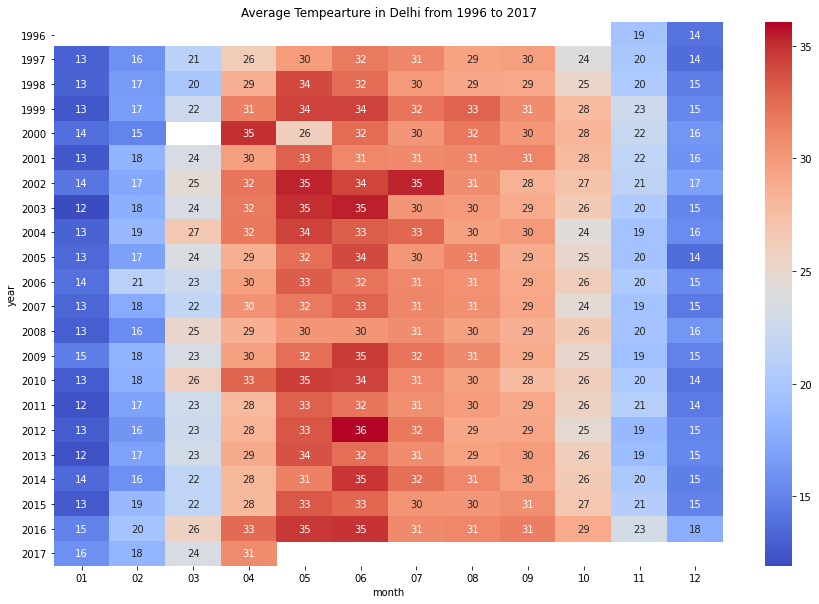

In [83]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [84]:
df[' _hum'].isna().sum()

757

In [0]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [0]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

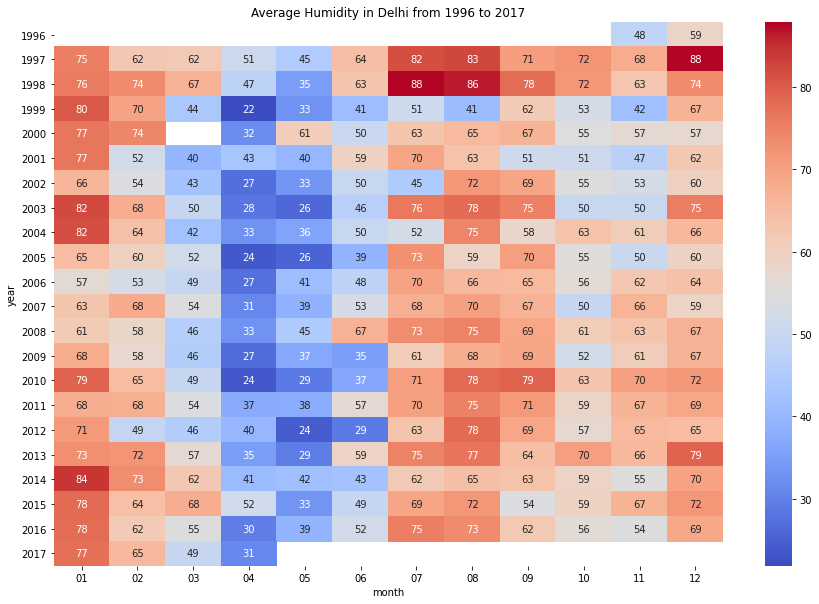

In [88]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()


# Time Series Forecasting

In [0]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [90]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [0]:
data = data.resample('D').mean()

In [92]:
data.temp.isna().sum()

141

In [0]:
data.fillna(data['temp'].mean(), inplace=True)

In [94]:
data.temp.isna().sum()

0

In [95]:
data.shape

(7480, 1)

In [96]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


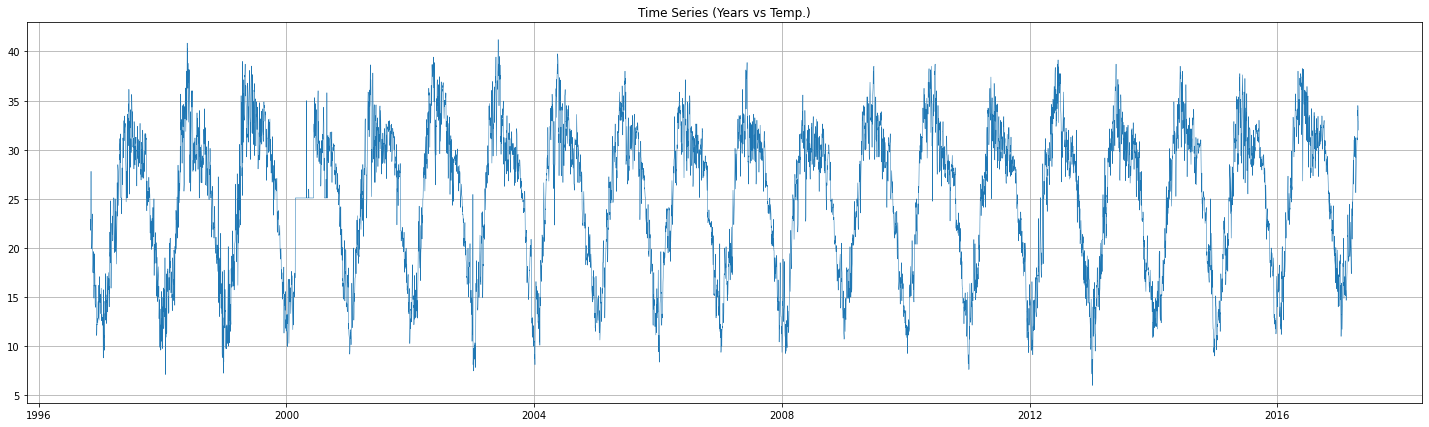

In [97]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [0]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [99]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [100]:
data_scaled.shape

(7480, 1)

In [0]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [0]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [0]:
k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 

In [104]:
X.shape

(7450, 30, 1)

In [105]:
Xtrain.shape

(7300, 30, 1)

In [106]:
Xtest.shape

(150, 30, 1)

In [0]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [54]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

Epoch 1/300
229/229 [==============================] - 26s 113ms/step - loss: 0.0199
Epoch 2/300
229/229 [==============================] - 26s 112ms/step - loss: 0.0118
Epoch 3/300
229/229 [==============================] - 25s 110ms/step - loss: 0.0115
Epoch 4/300
229/229 [==============================] - 25s 109ms/step - loss: 0.0107
Epoch 5/300
229/229 [==============================] - 25s 111ms/step - loss: 0.0110
Epoch 6/300
229/229 [==============================] - 26s 112ms/step - loss: 0.0103
Epoch 7/300
229/229 [==============================] - 25s 111ms/step - loss: 0.0103
Epoch 8/300
229/229 [==============================] - 28s 121ms/step - loss: 0.0102
Epoch 9/300
229/229 [==============================] - 25s 110ms/step - loss: 0.0101
Epoch 10/300
229/229 [==============================] - 26s 111ms/step - loss: 0.0103
Epoch 11/300
229/229 [==============================] - 25s 111ms/step - loss: 0.0099
Epoch 12/300
229/229 [==============================] - 26s 112

In [0]:
model.save("./regressor.hdf5")

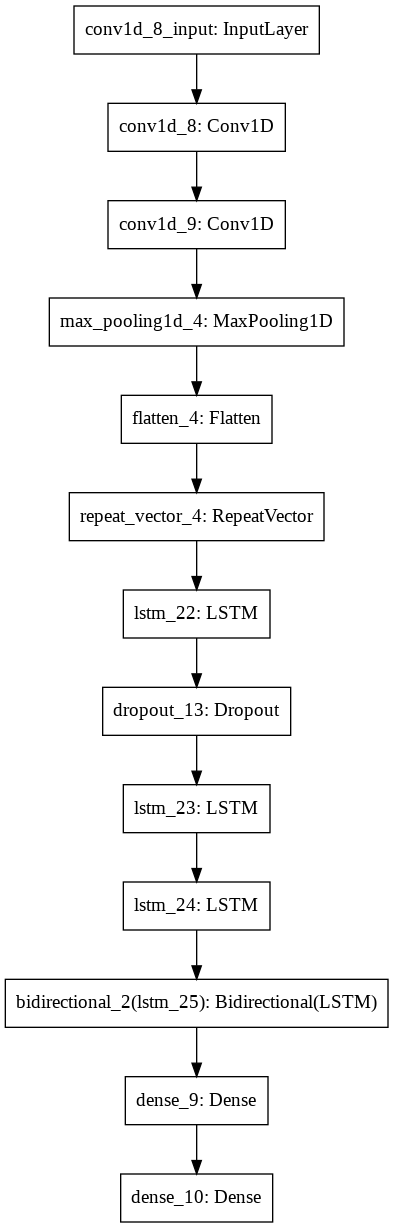

In [65]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
predict = model.predict(Xtest)

In [0]:
predict = scalar.inverse_transform(predict)

In [0]:
Ytesting = scalar.inverse_transform(Ytest)

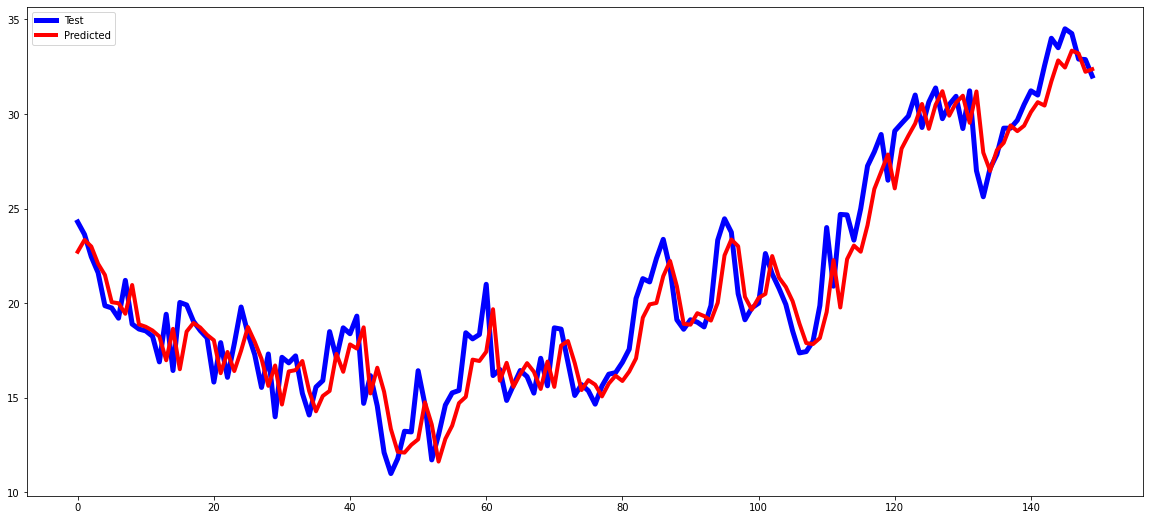

In [60]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

2.992469732353368